Assignment: Exploratory Data Analysis (EDA)
Dataset: US COVID-19 Mobility & Cases (2021)
2240007430

In this assignment, I applied EDA techniques to analyze the relationship between COVID-19 cases and mobility trends (Retail, Workplaces, Residential) in the United States during 2021.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 12)

# Data Loading and Cleaning



In [4]:
try:
    df = pd.read_csv('US_Covid_Mobility_2021.csv.csv')
    df['date'] = pd.to_datetime(df['date'])
except FileNotFoundError:
    df = pd.read_csv('US_Covid_Mobility_2021.csv')
    df['date'] = pd.to_datetime(df['date'])

df_clean = df.dropna(subset=['retail_recreation', 'workplaces', 'residential'])

print("Data Shape after cleaning:", df_clean.shape)
print("\nSummary Statistics:")
print(df_clean[['daily_cases', 'retail_recreation', 'workplaces']].describe())

Data Shape after cleaning: (20382, 17)

Summary Statistics:
        daily_cases  retail_recreation    workplaces
count  20382.000000       20382.000000  20382.000000
mean      70.841772           1.118340    -18.680257
std      294.850739          17.776693     12.711920
min        0.000000         -90.000000    -90.000000
25%        4.000000          -8.000000    -24.000000
50%       15.000000           0.000000    -17.000000
75%       48.000000          10.000000    -11.000000
max    11761.000000         160.000000     24.000000


# Data Visualization & Analysis
I created four visualizations to understand the trends:

National Daily Cases: To observe the infection waves throughout 2021.

Mobility Trends: To compare how time spent at "Workplaces" vs "Retail" changed.

Top 10 States: To see which states had the highest total cases.

Correlation Matrix: To measure the statistical relationship between staying home and infection rates.

# Graph 1: National Daily Cases

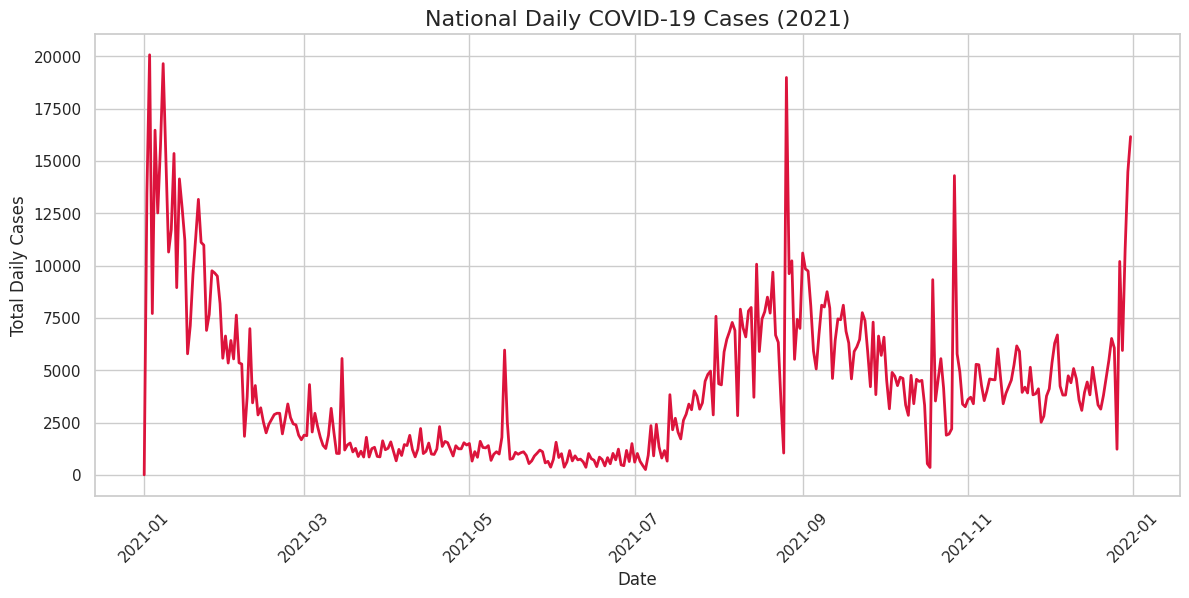

In [5]:
plt.figure(figsize=(14, 6))

daily_cases = df.groupby('date')['daily_cases'].sum().reset_index()


sns.lineplot(data=daily_cases, x='date', y='daily_cases', color='crimson', linewidth=2)

plt.title('National Daily COVID-19 Cases (2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Daily Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Graph 2: Mobility Trends (Home vs. Work)

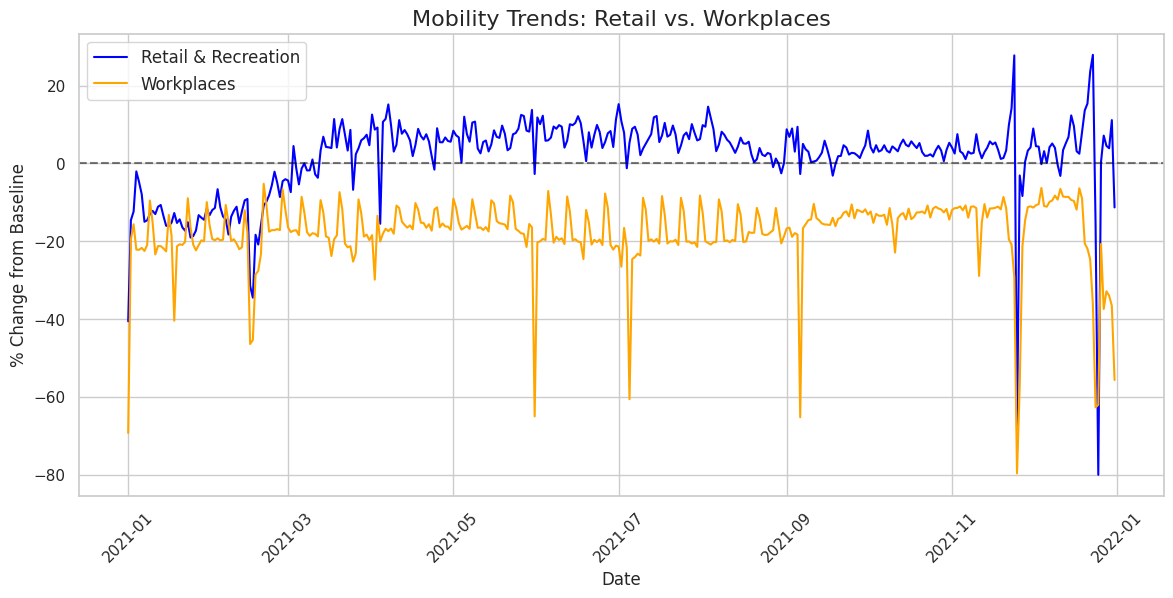

In [6]:
plt.figure(figsize=(14, 6))
mobility = df.groupby('date')[['retail_recreation', 'workplaces']].mean().reset_index()
sns.lineplot(data=mobility, x='date', y='retail_recreation', label='Retail & Recreation', color='blue')
sns.lineplot(data=mobility, x='date', y='workplaces', label='Workplaces', color='orange')
plt.title('Mobility Trends: Retail vs. Workplaces', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('% Change from Baseline', fontsize=12)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)  # Add a baseline line at 0
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Graph 3: Top 10 States by Total Cases

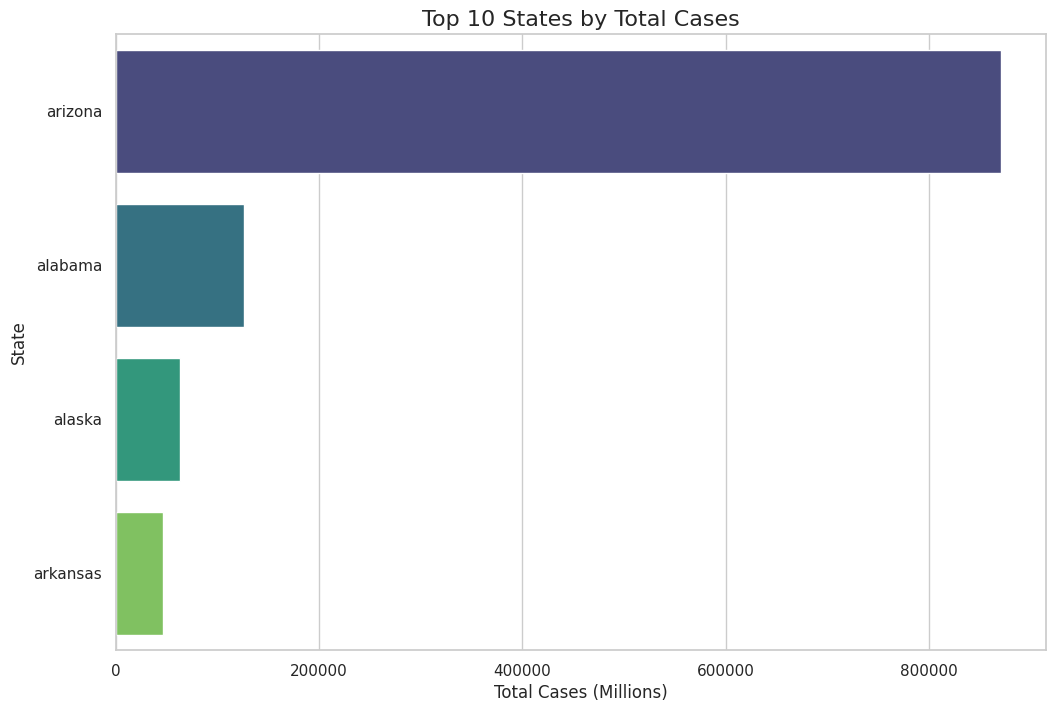

In [7]:
plt.figure(figsize=(12, 8))

top_states = df.groupby('state')['cases'].max().sort_values(ascending=False).head(10).reset_index()


sns.barplot(data=top_states, x='cases', y='state', palette='viridis', hue='state', legend=False)

plt.title('Top 10 States by Total Cases', fontsize=16)
plt.xlabel('Total Cases (Millions)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

# Graph 4: Correlation Matrix

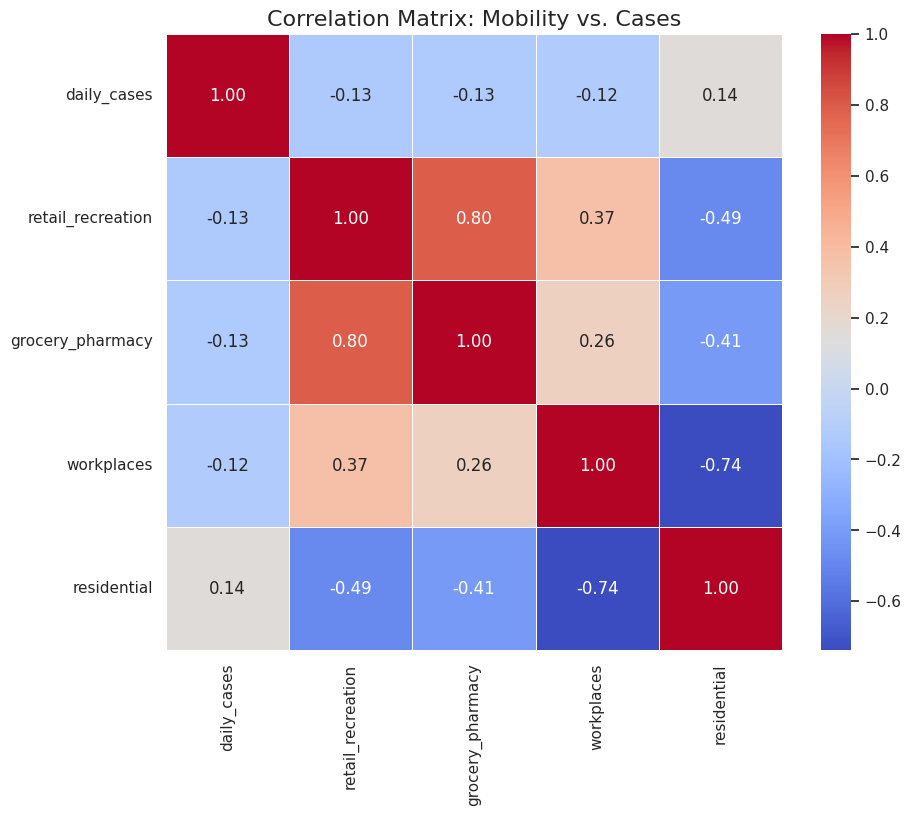

In [8]:
plt.figure(figsize=(10, 8))

corr_cols = ['daily_cases', 'retail_recreation', 'grocery_pharmacy', 'workplaces', 'residential']

corr_matrix = df_clean[corr_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

plt.title('Correlation Matrix: Mobility vs. Cases', fontsize=16)
plt.show()